In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

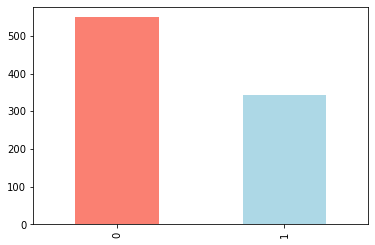

In [5]:
df["Survived"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Make a correlation matrix
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


(7.5, -0.5)

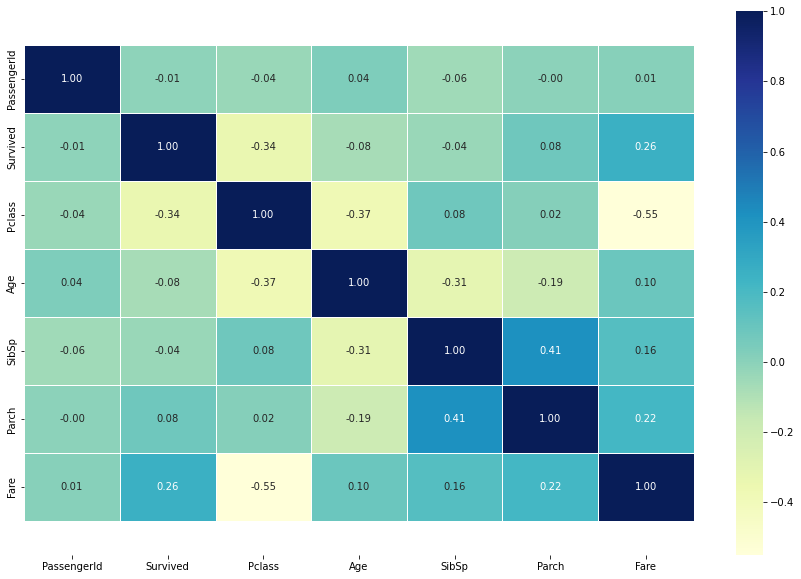

In [9]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [10]:
df.drop(['PassengerId','Name','SibSp', 'Parch', 'Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [11]:
dummies = pd.get_dummies(df.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [12]:
df_tmp = pd.concat([df, dummies], axis='columns')
df_tmp.head()

,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,male,22.0,7.2500,0,1
1,1,1,female,38.0,71.2833,1,0
2,1,3,female,26.0,7.9250,1,0
3,1,1,female,35.0,53.1000,1,0
4,0,3,male,35.0,8.0500,0,1


In [13]:
df_tmp.drop('Sex', axis='columns',inplace=True)
df_tmp.head()

,Survived,Pclass,Age,Fare,female,male
0,0,3,22.0,7.2500,0,1
1,1,1,38.0,71.2833,1,0
2,1,3,26.0,7.9250,1,0
3,1,1,35.0,53.1000,1,0
4,0,3,35.0,8.0500,0,1


In [14]:
df_tmp.columns[df_tmp.isna().any()]

Index(['Age'], dtype='object')

In [15]:
df_tmp.Age = df_tmp.Age.fillna(df_tmp.Age.mean())

In [16]:
target=df_tmp.Survived
df_tmp=df_tmp.drop('Survived',axis='columns')

In [17]:
df_tmp

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
...,...,...,...,...,...
886,2,27.000000,13.0000,0,1
887,1,19.000000,30.0000,1,0
888,3,29.699118,23.4500,1,0
889,1,26.000000,30.0000,0,1


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df_tmp, target, test_size=0.2)

In [19]:
len(df_tmp), len(X_train), len(X_val)

(891, 712, 179)

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [21]:
model.fit(X_train, y_train)

GaussianNB()

In [22]:
model.score(X_val, y_val)

0.7318435754189944

In [23]:
X_val

,Pclass,Age,Fare,female,male
39,3,14.000000,11.2417,1,0
798,3,30.000000,7.2292,0,1
645,1,48.000000,76.7292,0,1
346,2,40.000000,13.0000,1,0
564,3,29.699118,8.0500,1,0
...,...,...,...,...,...
351,1,29.699118,35.0000,0,1
72,2,21.000000,73.5000,0,1
558,1,39.000000,79.6500,1,0
604,1,35.000000,26.5500,0,1


In [24]:
y_val

39     1
798    0
645    1
346    1
564    0
      ..
351    0
72     0
558    1
604    1
709    1
Name: Survived, Length: 179, dtype: int64

Import test set

In [25]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
df_test.drop(['PassengerId','Name','SibSp', 'Parch', 'Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df_test.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


In [27]:
dummies = pd.get_dummies(df.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [28]:
df_test= pd.concat([df_test, dummies], axis='columns')
df_test.head()

,Pclass,Sex,Age,Fare,female,male
0,3.0,male,34.5,7.8292,0,1
1,3.0,female,47.0,7.0000,1,0
2,2.0,male,62.0,9.6875,1,0
3,3.0,male,27.0,8.6625,1,0
4,3.0,female,22.0,12.2875,0,1


In [29]:
df_test.drop('Sex', axis='columns',inplace=True)
df_test.head()

,Pclass,Age,Fare,female,male
0,3.0,34.5,7.8292,0,1
1,3.0,47.0,7.0000,1,0
2,2.0,62.0,9.6875,1,0
3,3.0,27.0,8.6625,1,0
4,3.0,22.0,12.2875,0,1


In [30]:
df_test.columns[df_test.isna().any()]

Index(['Pclass', 'Age', 'Fare'], dtype='object')

In [31]:
df_test.Age = df_test.Age.fillna(df_test.Age.mean())

In [32]:
df_test.Pclass = df_test.Pclass.fillna(df_test.Pclass.mean())

In [33]:
df_test.Fare = df_test.Fare.fillna(df_test.Fare.mean())

In [34]:
X_test = df_test

In [35]:
X_test

,Pclass,Age,Fare,female,male
0,3.00000,34.50000,7.829200,0,1
1,3.00000,47.00000,7.000000,1,0
2,2.00000,62.00000,9.687500,1,0
3,3.00000,27.00000,8.662500,1,0
4,3.00000,22.00000,12.287500,0,1
...,...,...,...,...,...
886,2.26555,30.27259,35.627188,0,1
887,2.26555,30.27259,35.627188,1,0
888,2.26555,30.27259,35.627188,1,0
889,2.26555,30.27259,35.627188,0,1


In [36]:
model.predict(X_test[:10])

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [37]:
model.predict_proba(X_test[:10])

array([[0.99333722, 0.00666278],
       [0.06541244, 0.93458756],
       [0.02117271, 0.97882729],
       [0.06790065, 0.93209935],
       [0.99257914, 0.00742086],
       [0.99092663, 0.00907337],
       [0.99318228, 0.00681772],
       [0.98314143, 0.01685857],
       [0.05790906, 0.94209094],
       [0.06116147, 0.93883853]])

In [39]:
y_preds = model.predict(X_test)

In [40]:
y_preds

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,